In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
import os
import glob

In [119]:
data_home_dir = '../results/'
sorted(os.listdir(data_home_dir))

['04-06-2022-23-01-22_Forward_Euler_Result',
 '04-06-2022-23-03-27_Forward_Euler_Result',
 '04-06-2022-23-20-19_Forward_Euler_Result',
 '04-06-2022-23-36-11_Forward_Euler_Result',
 '04-06-2022-23-58-54_Forward_Euler_Result',
 '05-06-2022-01-25-22_Forward_Euler_Result',
 '05-06-2022-01-28-42_Forward_Euler_Result',
 '05-06-2022-01-31-15_Forward_Euler_Result',
 '05-06-2022-01-33-53_Forward_Euler_Result',
 '05-06-2022-01-34-46_Forward_Euler_Result',
 '05-06-2022-01-34-48_Forward_Euler_Result',
 '05-06-2022-01-36-37_Forward_Euler_Result',
 '05-06-2022-01-38-12_Forward_Euler_Result']

In [129]:
folder_name = os.path.join(data_home_dir, '05-06-2022-01-31-15_Forward_Euler_Result')

In [130]:
file_names = sorted(os.listdir(folder_name))

In [131]:
datas = []
for file_name in file_names:
    datas.append(pd.read_csv(os.path.join(folder_name, file_name)))

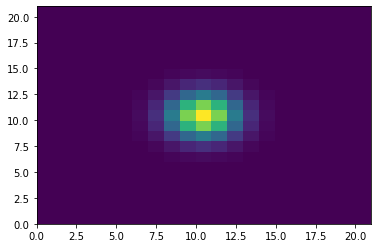

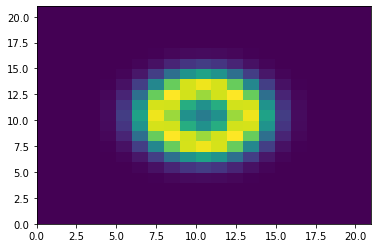

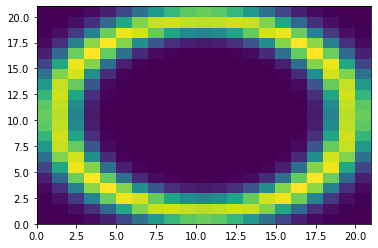

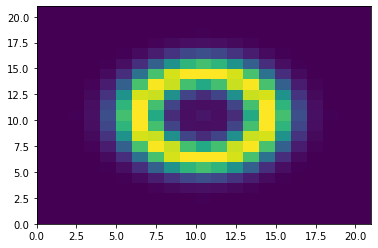

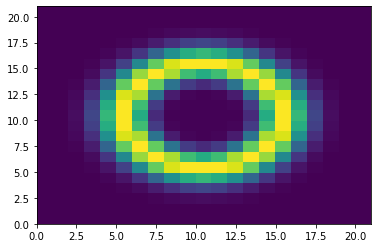

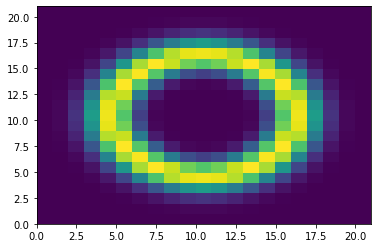

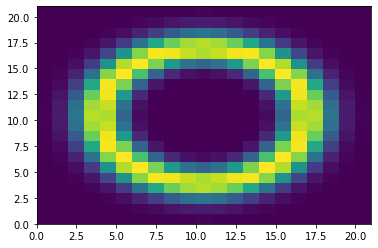

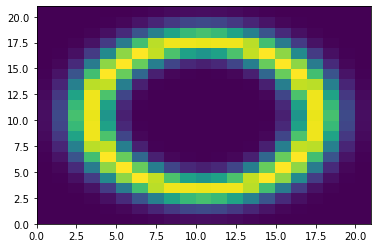

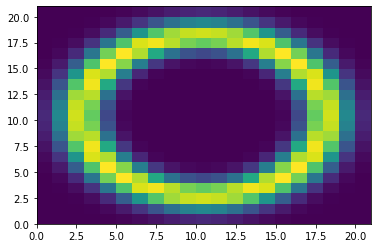

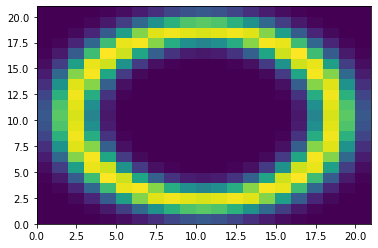

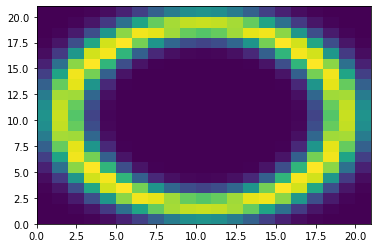

In [132]:
for i in range(11):
    plt.pcolor(datas[i][' probability'].to_numpy().reshape((21, 21)))
    plt.show()

In [133]:
datas[1][' probability'].to_numpy().reshape((21, 21))[10,10]

0.00773931

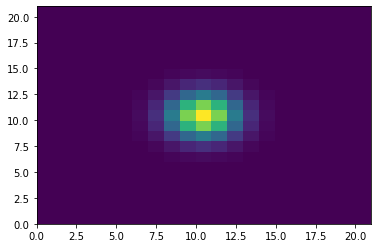

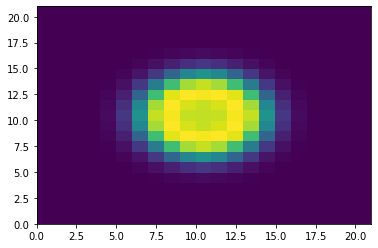

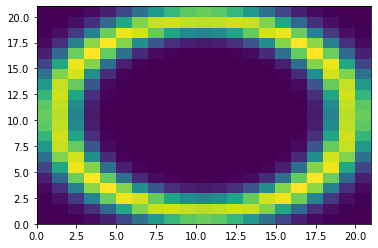

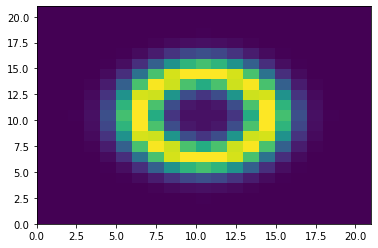

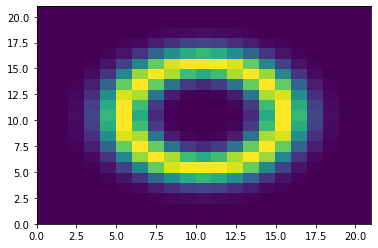

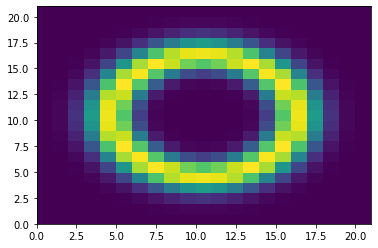

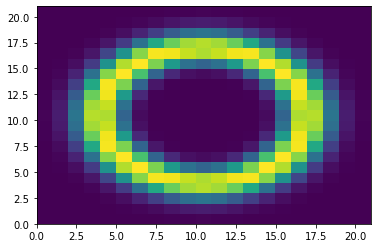

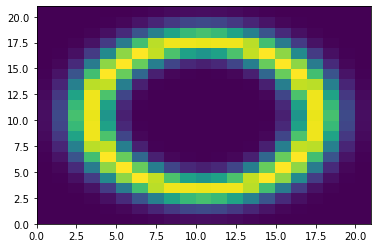

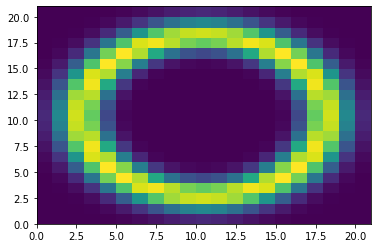

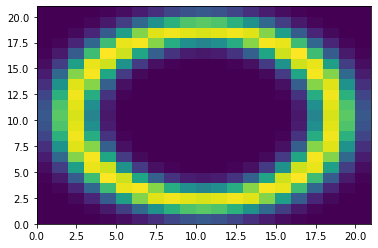

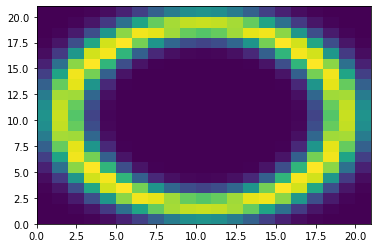

In [116]:
for i in range(11):
    plt.pcolor(datas[i][' probability'].to_numpy().reshape((21, 21)))
    plt.show()

In [113]:
datas[1][' probability'].to_numpy().reshape((21, 21))[10,10]

0.0163964